#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [5]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [6]:
df.shape

(26707, 34)

### Data Preporcessing

#### 1) Handling Null Values

In [18]:
def null_df(data):
    nv = data.isnull().sum()
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Val':nv.values,
                          'Per_Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [19]:
nv_df = null_df(df)
nv_df

,Feature,Null_Val,Per_Null
15,has_health_insur,12274,45.957989
26,income_level,4423,16.561201
10,dr_recc_h1n1_vacc,2160,8.087767
11,dr_recc_seasonal_vacc,2160,8.087767
28,housing_status,2042,7.645936
29,employment,1463,5.477965
27,marital_status,1408,5.272026
23,qualification,1407,5.268282
12,chronic_medic_condition,971,3.635751
13,cont_child_undr_6_mnths,820,3.070356


In [14]:
df['has_health_insur'].value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [15]:
(1736/14433)*100

12.027991408577565

In [20]:
df['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [21]:
df['dr_recc_h1n1_vacc'].value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [22]:
df['dr_recc_seasonal_vacc'].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

#### Dropping features having more than 7% null values

In [27]:
nv_df['Feature'][nv_df['Per_Null']>7].values

array(['has_health_insur', 'income_level', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'housing_status'], dtype=object)

In [28]:
df1 = df.copy()

In [29]:
df.drop(['unique_id','has_health_insur', 'income_level', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'housing_status'],axis=1,inplace=True)

print(df.shape)
print(df.columns)

(26707, 28)
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [31]:
nv_df = null_df(df)
nv_df

,Feature,Null_Val,Per_Null
23,employment,1463,5.477965
22,marital_status,1408,5.272026
19,qualification,1407,5.268282
9,chronic_medic_condition,971,3.635751
10,cont_child_undr_6_mnths,820,3.070356
11,is_health_worker,804,3.010447
17,sick_from_seas_vacc,537,2.010709
16,is_seas_risky,514,1.924589
15,is_seas_vacc_effective,462,1.729884
14,sick_from_h1n1_vacc,395,1.479013


In [32]:
df.shape

(26707, 28)

In [33]:
df.dropna(inplace=True)
df.shape

(24002, 28)

#### Percentage of Data Loss

In [34]:
((26707-24002)/26707)*100

10.128430748492905

In [35]:
nv_df = null_df(df)
nv_df

,Feature,Null_Val,Per_Null
0,h1n1_worry,0,0.0
1,h1n1_awareness,0,0.0
26,no_of_children,0,0.0
25,no_of_adults,0,0.0
24,census_msa,0,0.0
23,employment,0,0.0
22,marital_status,0,0.0
21,sex,0,0.0
20,race,0,0.0
19,qualification,0,0.0


#### 2) Handling Duplicates

In [36]:
df.duplicated().sum()

22

In [38]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [39]:
df.shape

(23980, 28)

#### 3) Check data types

In [40]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
marital_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h

In [42]:
obj_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(obj_cols)
print(num_cols)

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [43]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket,qualification,race,sex,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,18 - 34 Years,College Graduate,White,Male,Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,65+ Years,12 Years,White,Female,Not Married,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,Married,Employed,"MSA, Not Principle City",1.0,0.0,0


### EDA

In [44]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [47]:
df['h1n1_vaccine'].value_counts()

0    18828
1     5152
Name: h1n1_vaccine, dtype: int64

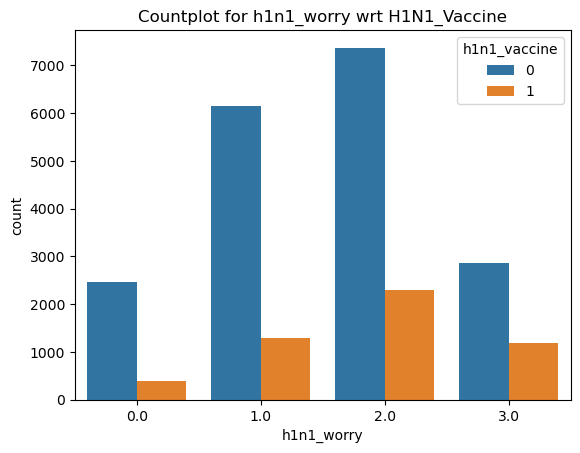

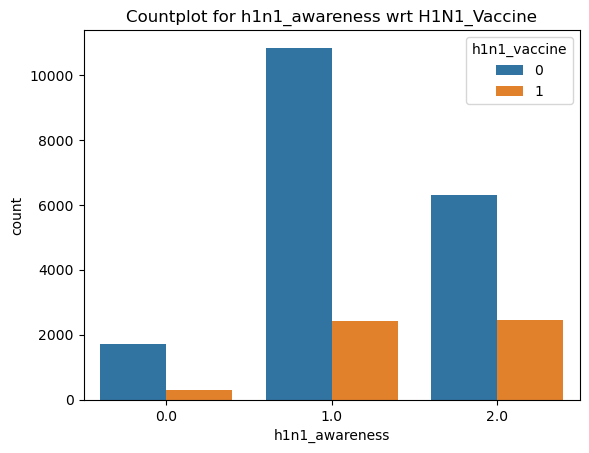

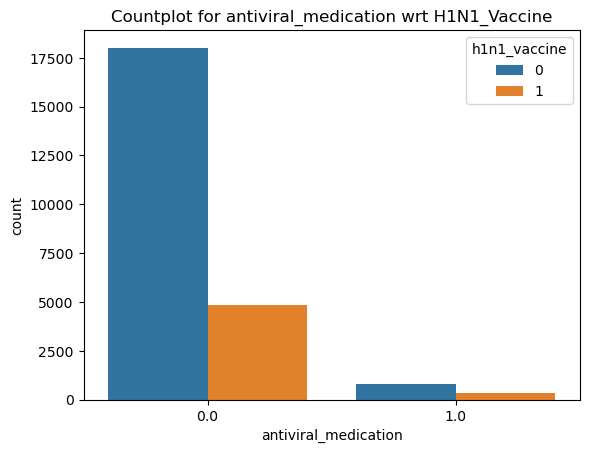

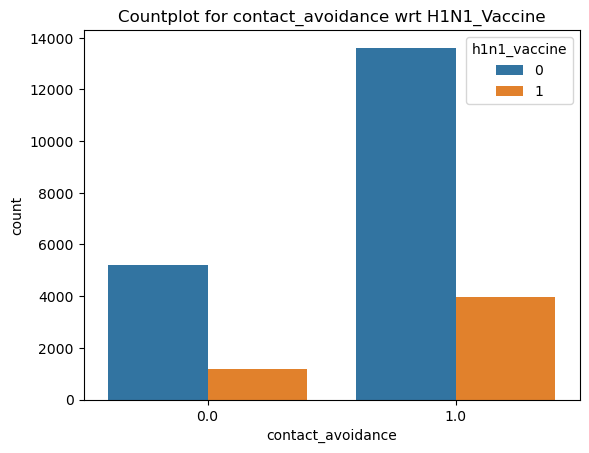

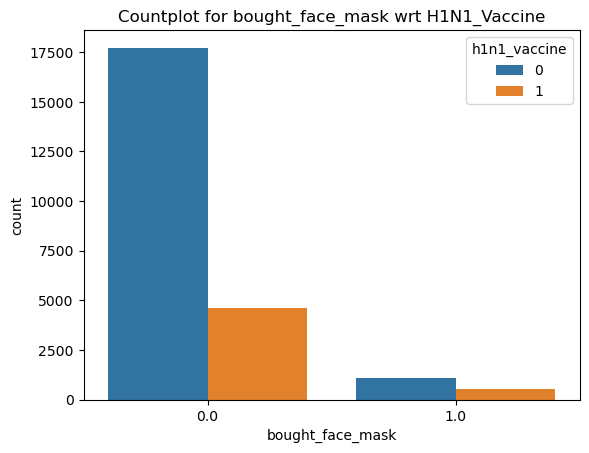

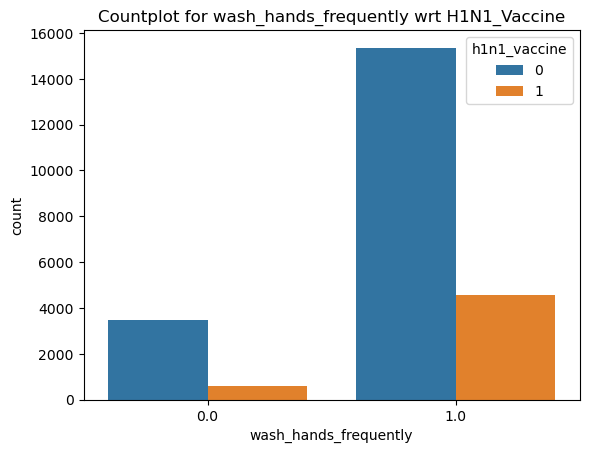

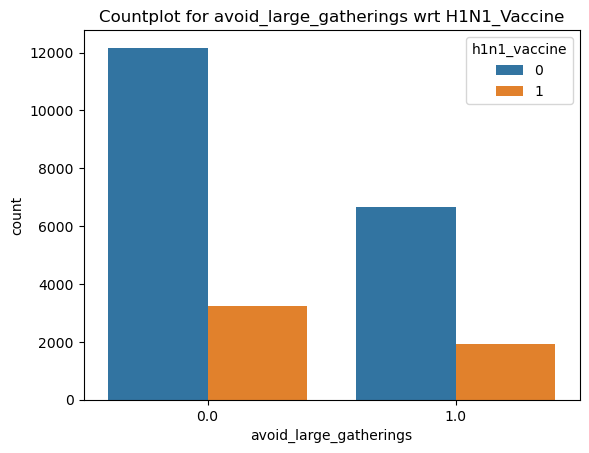

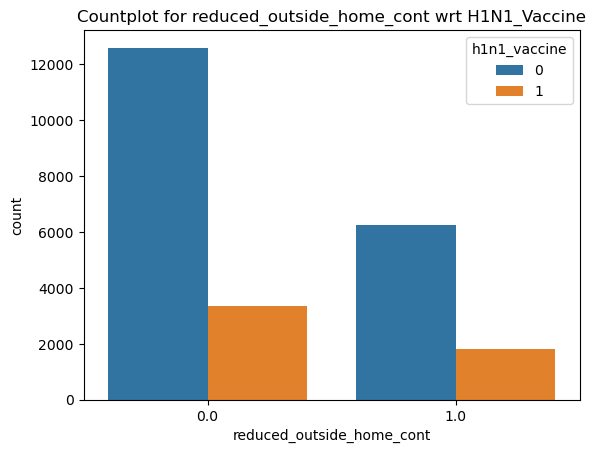

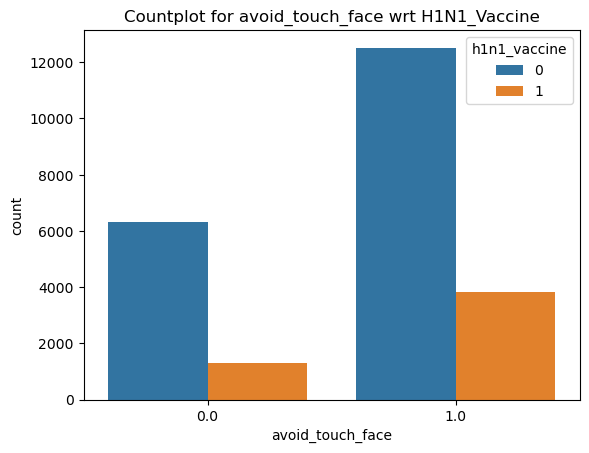

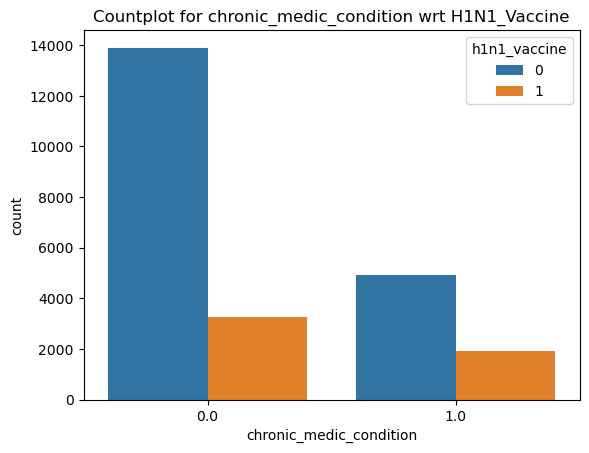

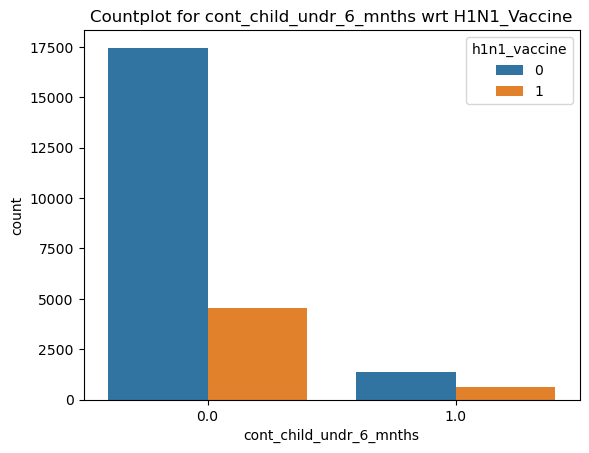

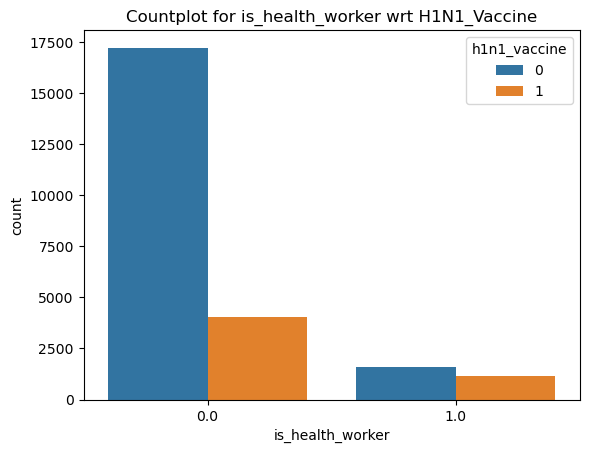

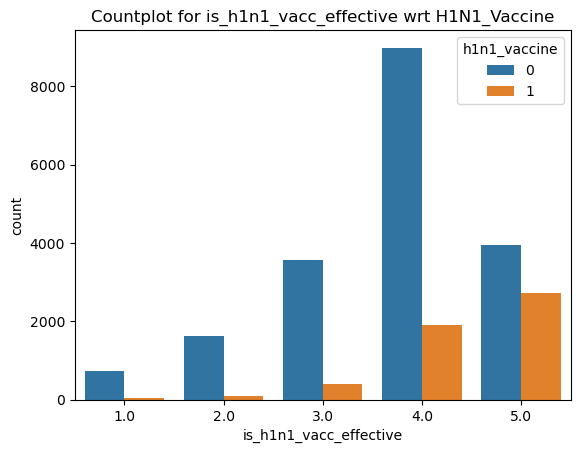

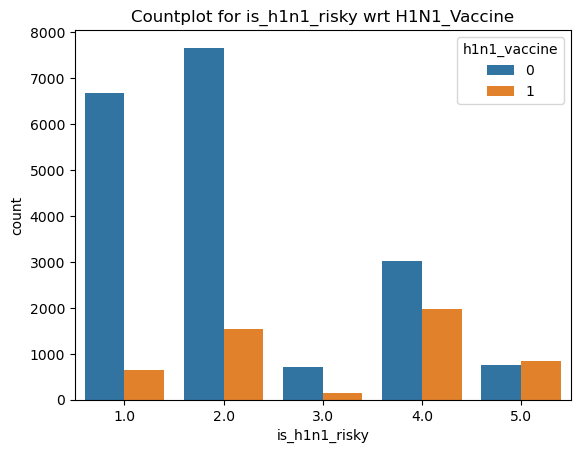

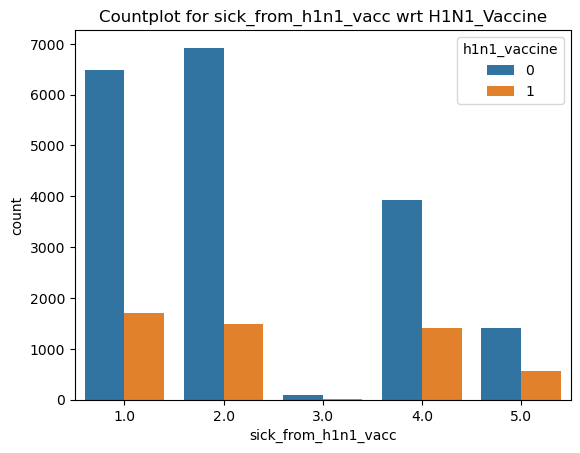

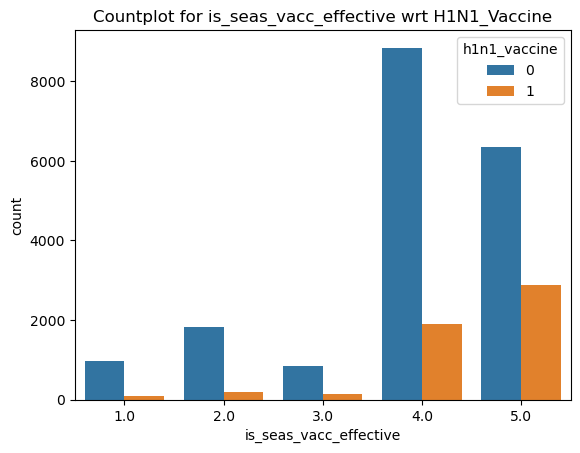

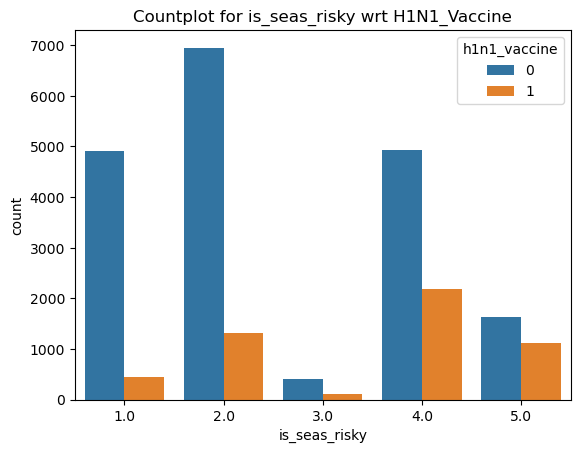

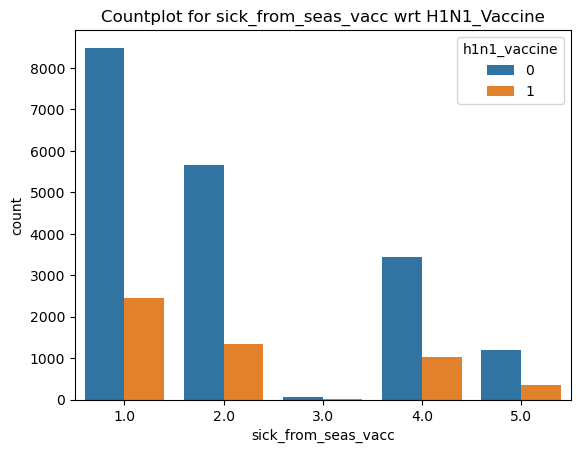

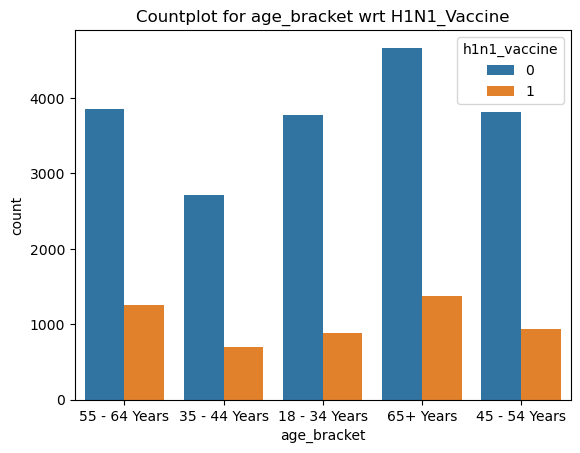

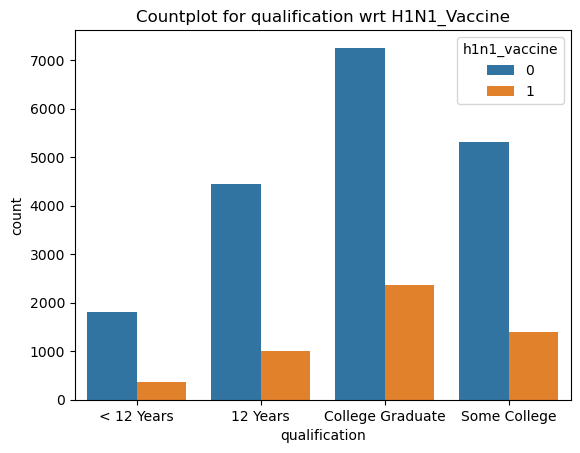

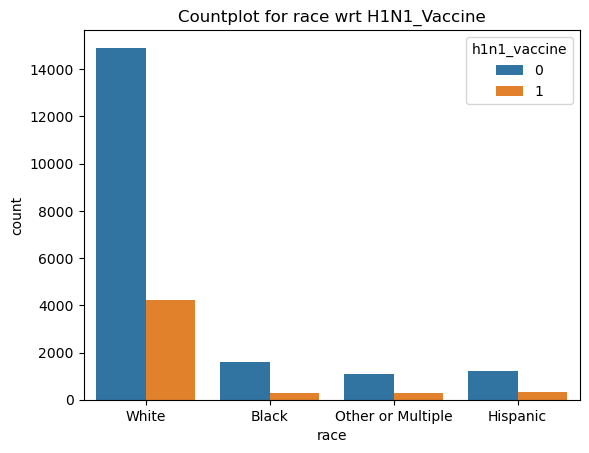

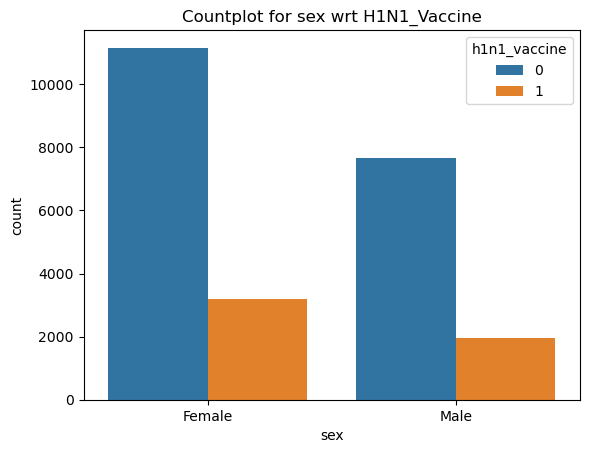

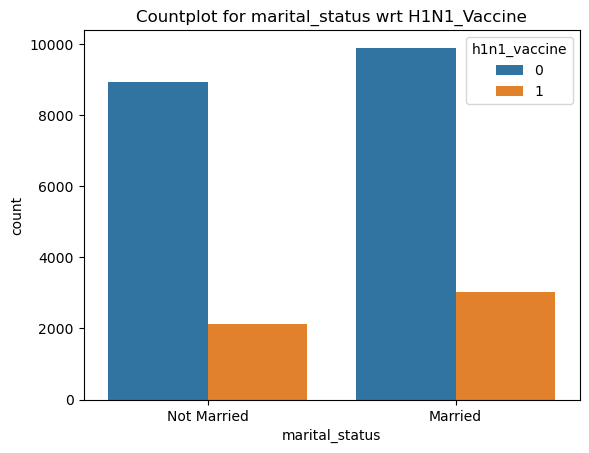

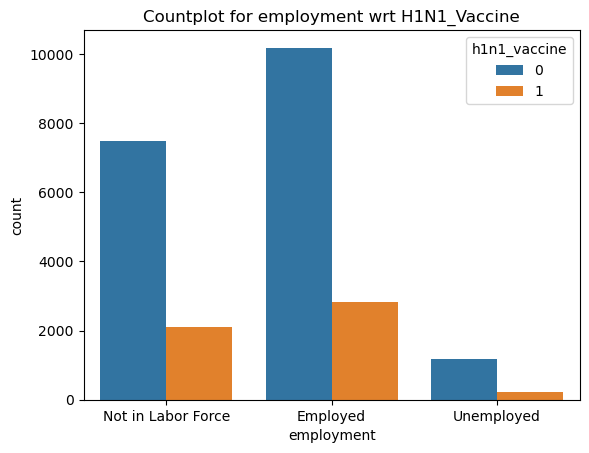

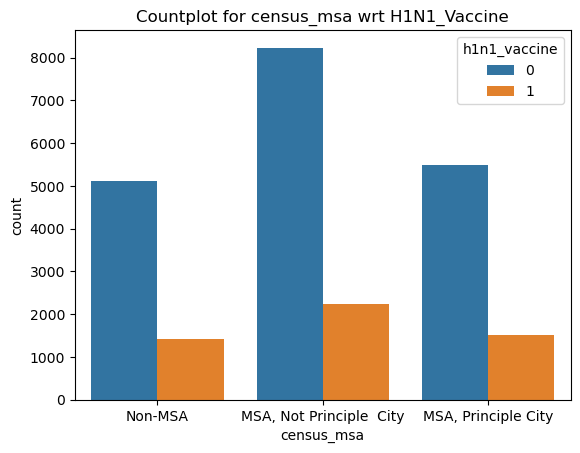

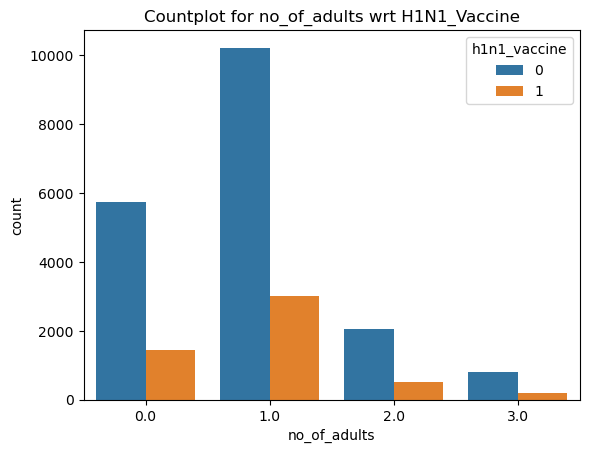

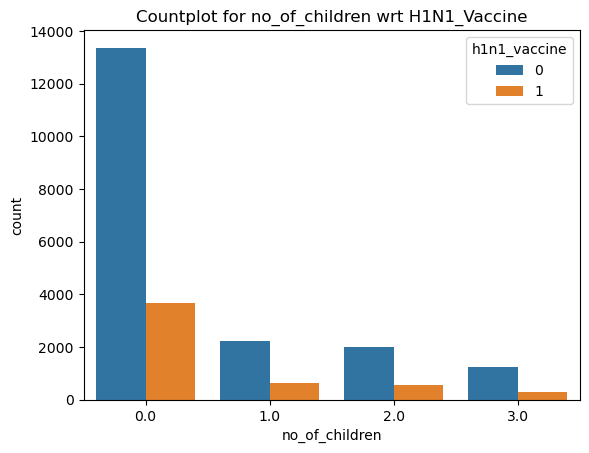

In [46]:
for i in df.columns[:-1]:
    sns.countplot(x=df[i],hue=df['h1n1_vaccine'])
    plt.title(f'Countplot for {i} wrt H1N1_Vaccine')
    plt.show()

#### Infernce
1) IDs who are somewhat worried about H1N1_vaccine are likely to be more vaccinated.<br>
2) Ids who have not taken antiviral vaccination are more likely to be vaccinated<br>
3) Ids who bear some chronic medical condition are more likely to be vaccinated<br>

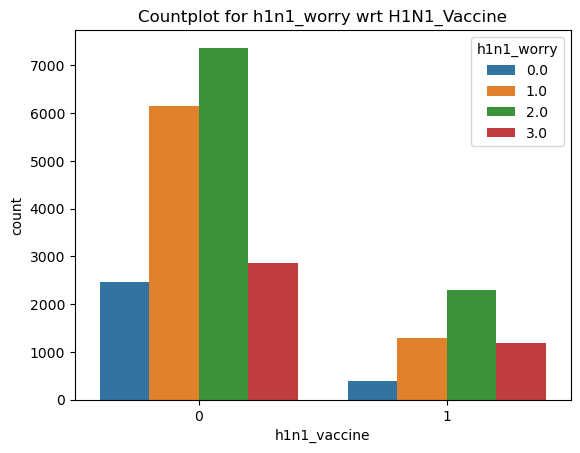

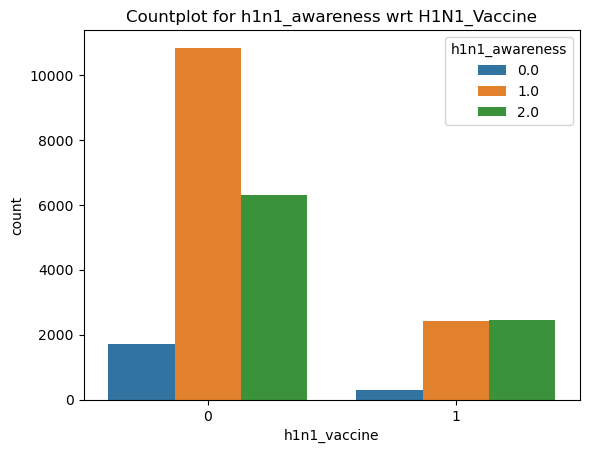

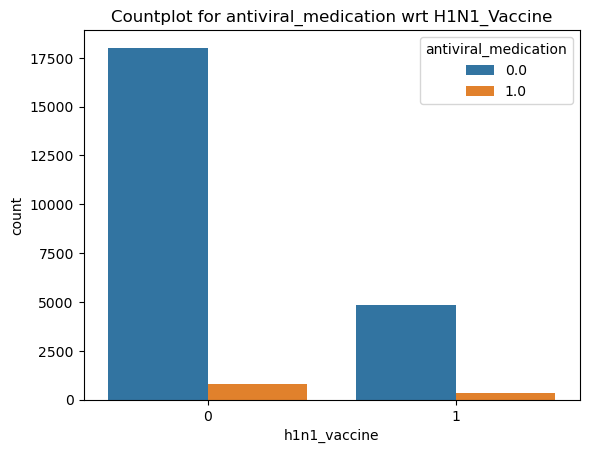

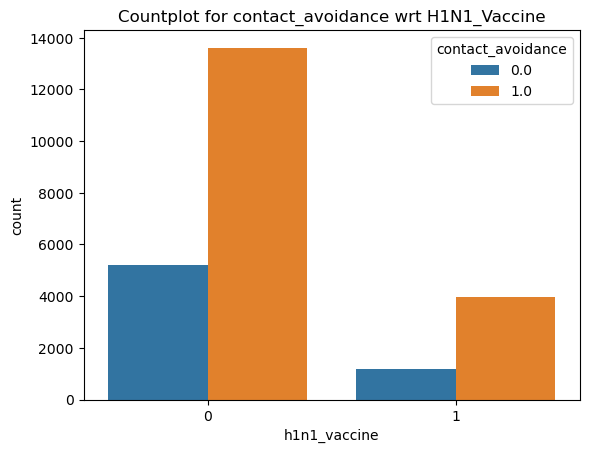

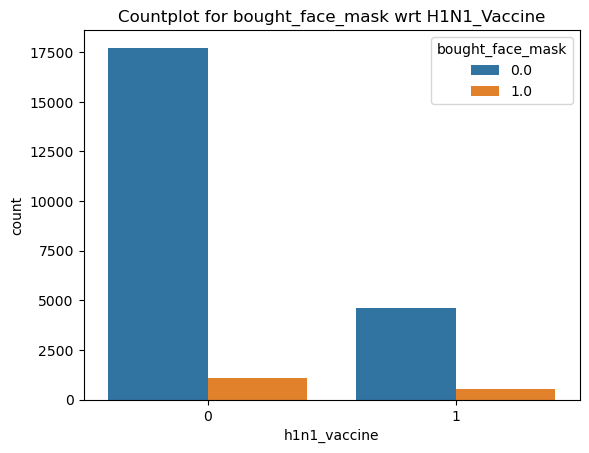

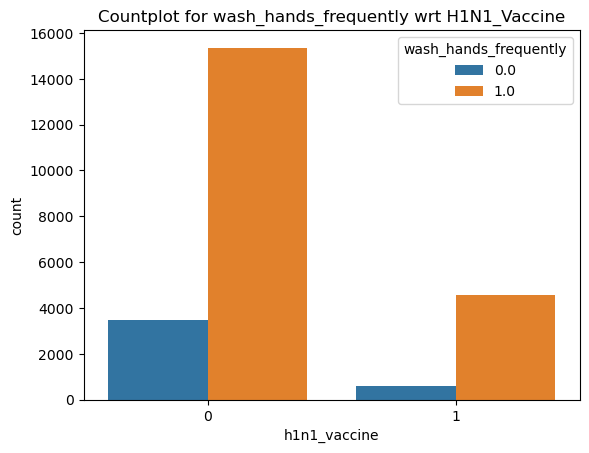

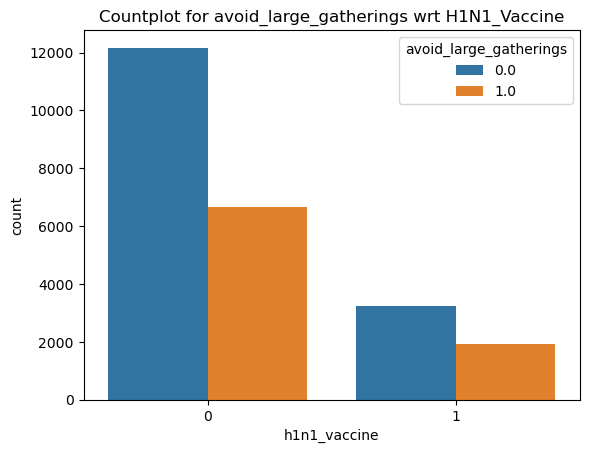

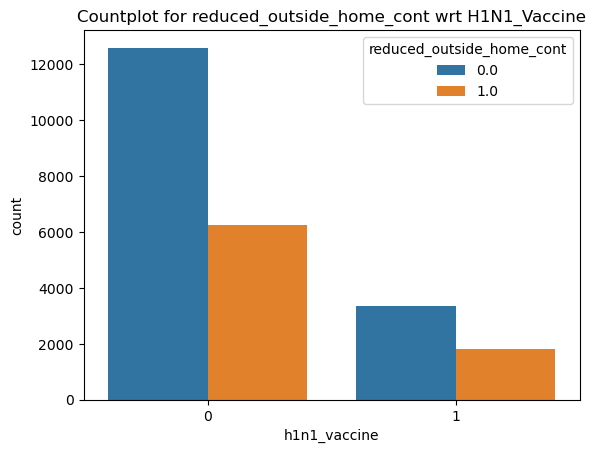

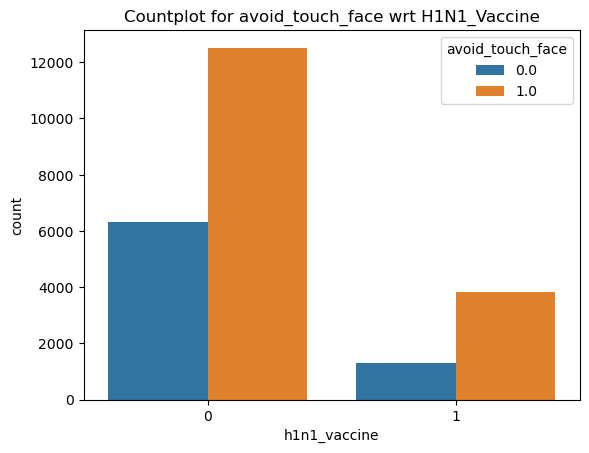

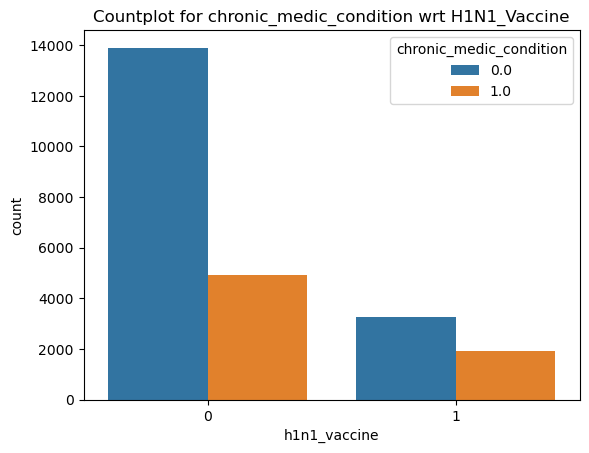

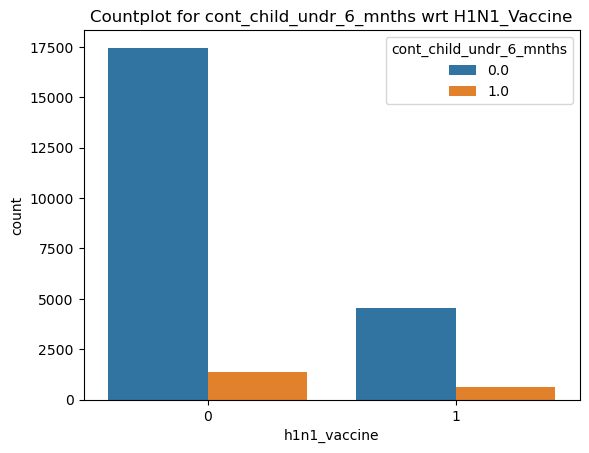

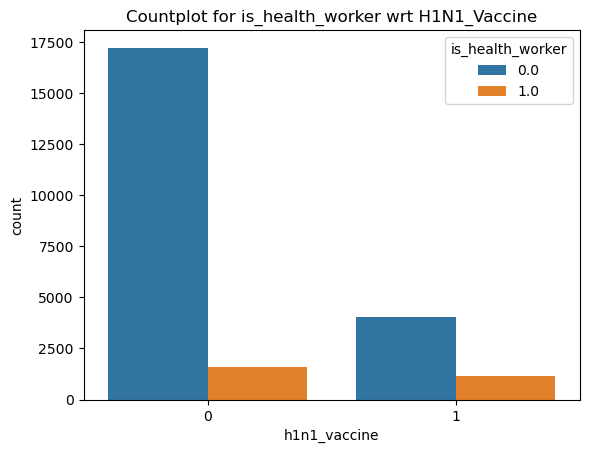

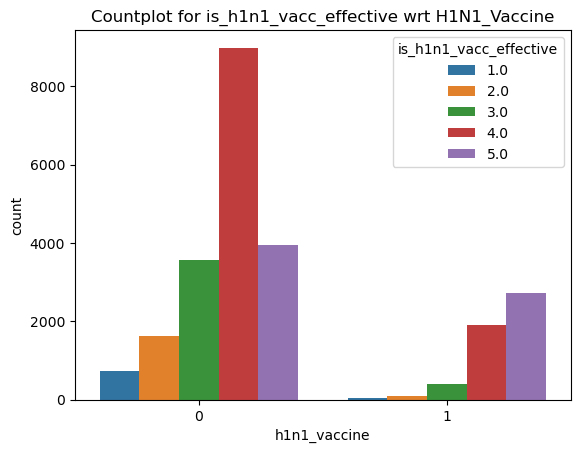

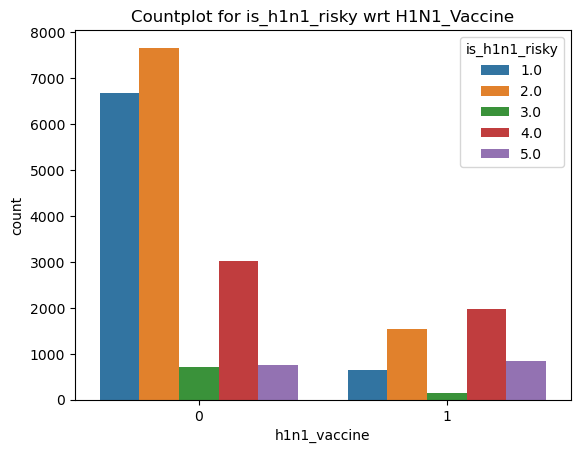

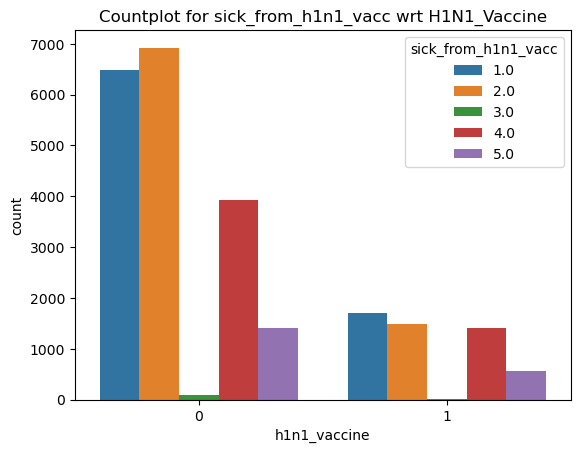

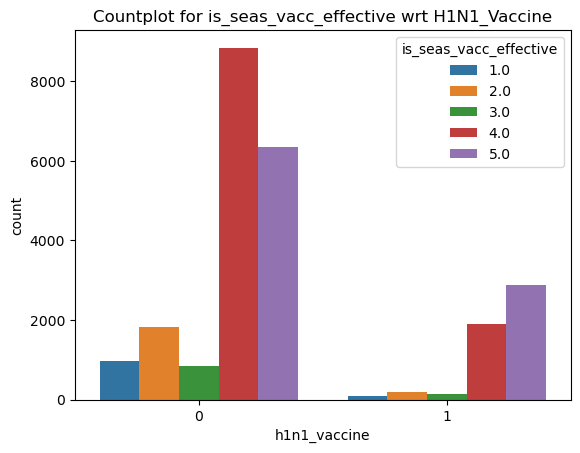

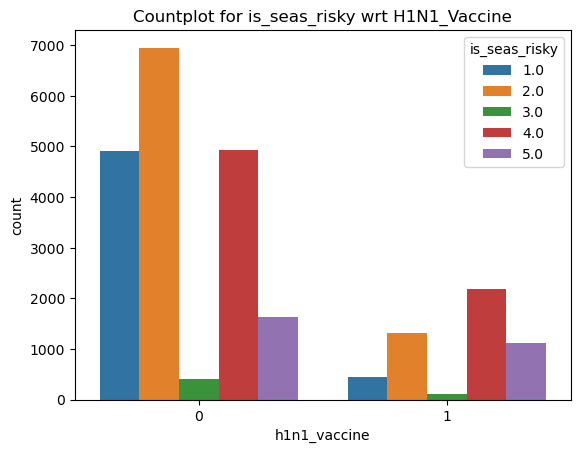

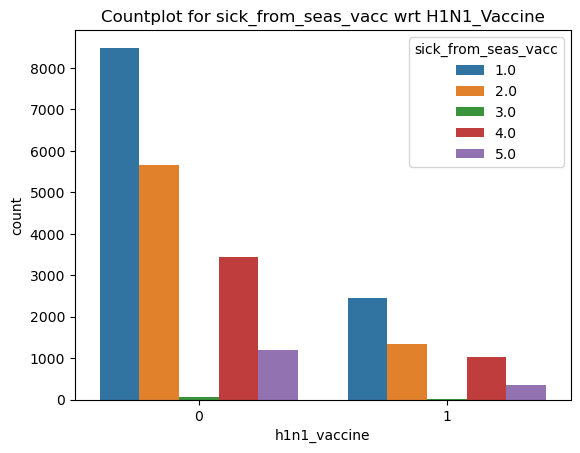

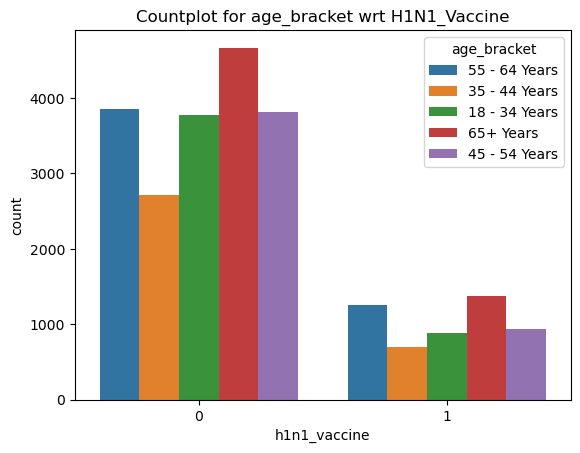

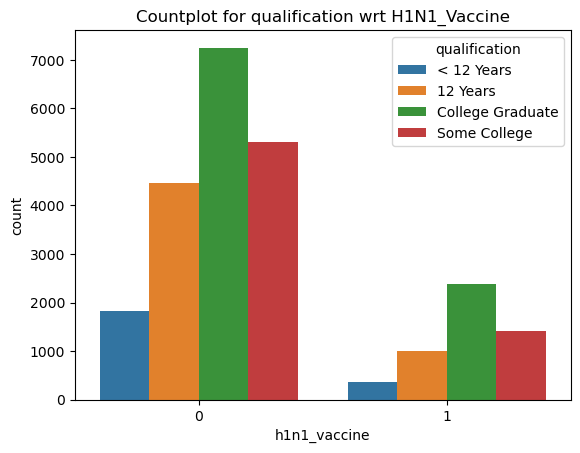

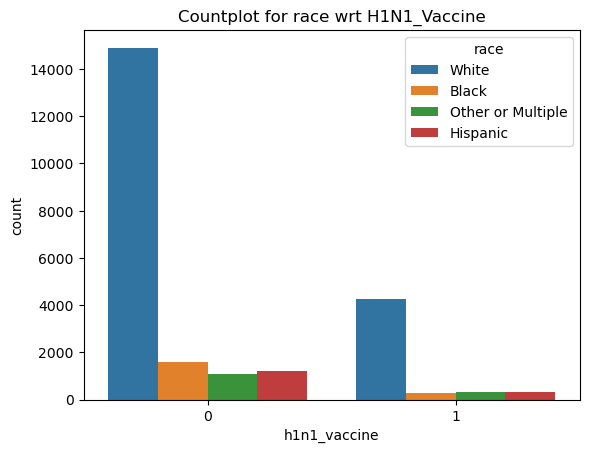

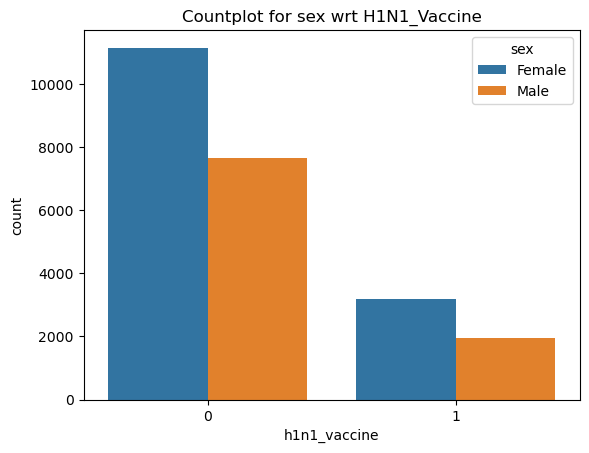

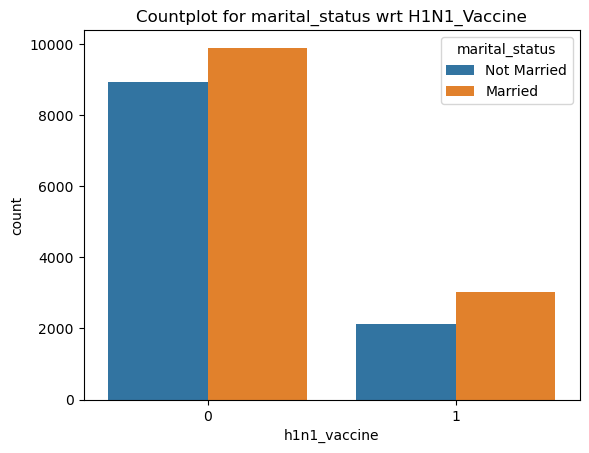

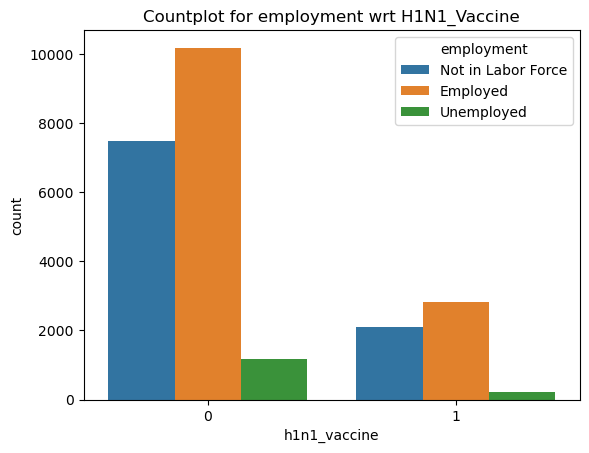

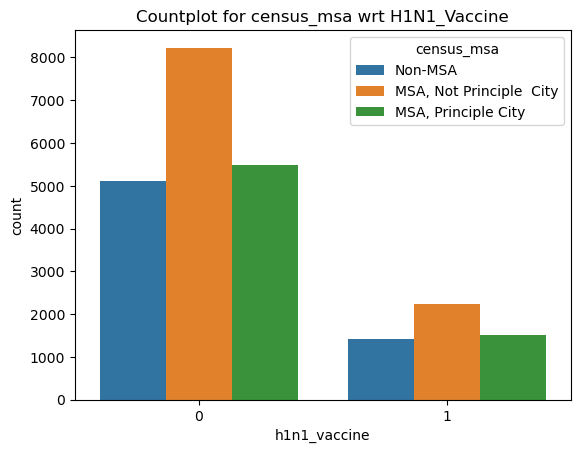

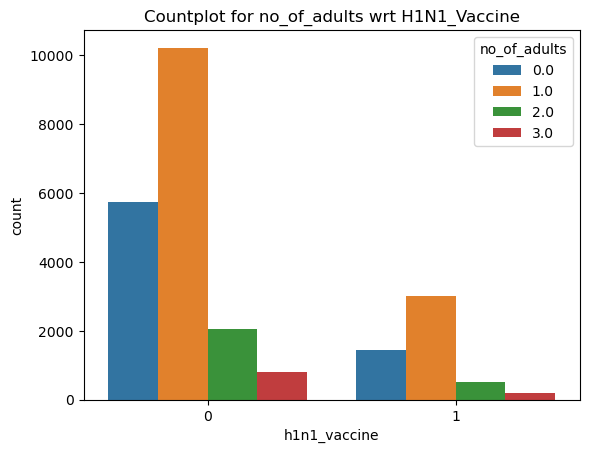

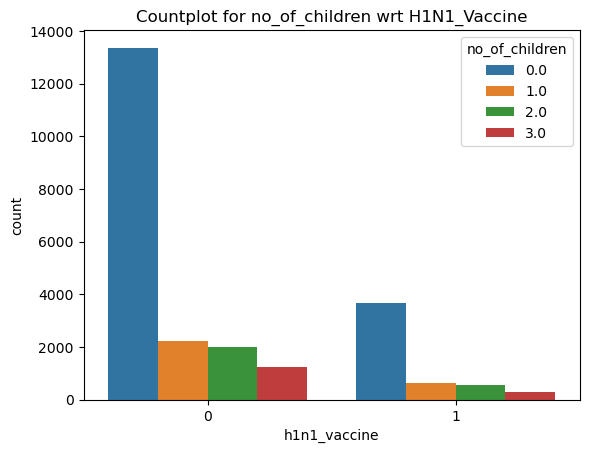

In [48]:
for i in df.columns[:-1]:
    sns.countplot(x=df['h1n1_vaccine'],hue=df[i])
    plt.title(f'Countplot for {i} wrt H1N1_Vaccine')
    plt.show()

#### Checking for presence of Continous Feature

In [51]:
for i in df.columns:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('*'*40)

Feature h1n1_worry
Unique Values - 4
Value Counts
2.0    9667
1.0    7415
3.0    4045
0.0    2853
Name: h1n1_worry, dtype: int64
****************************************
Feature h1n1_awareness
Unique Values - 3
Value Counts
1.0    13246
2.0     8750
0.0     1984
Name: h1n1_awareness, dtype: int64
****************************************
Feature antiviral_medication
Unique Values - 2
Value Counts
0.0    22837
1.0     1143
Name: antiviral_medication, dtype: int64
****************************************
Feature contact_avoidance
Unique Values - 2
Value Counts
1.0    17598
0.0     6382
Name: contact_avoidance, dtype: int64
****************************************
Feature bought_face_mask
Unique Values - 2
Value Counts
0.0    22355
1.0     1625
Name: bought_face_mask, dtype: int64
****************************************
Feature wash_hands_frequently
Unique Values - 2
Value Counts
1.0    19909
0.0     4071
Name: wash_hands_frequently, dtype: int64
****************************************
F

### Correlation

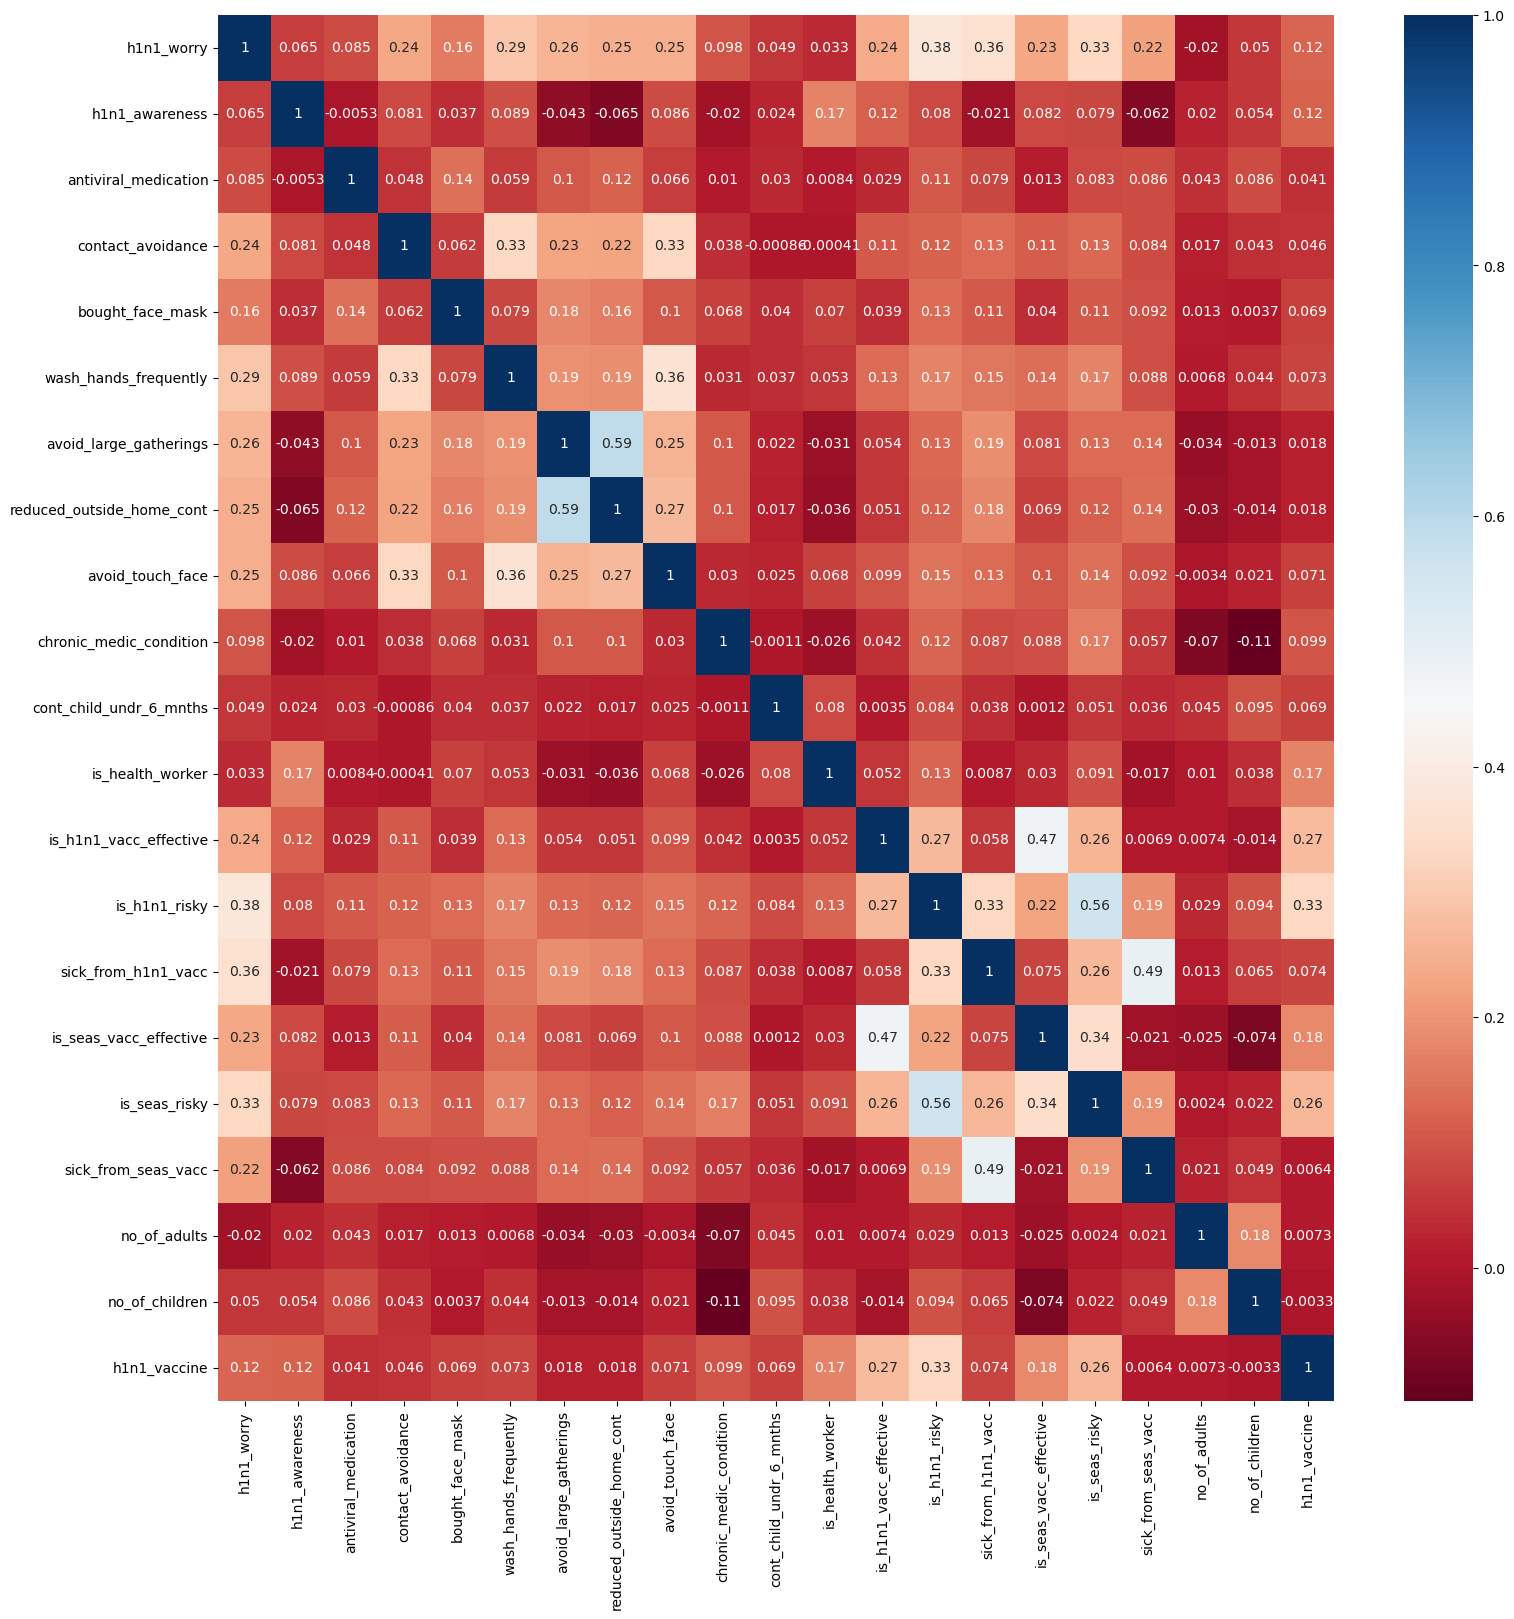

In [54]:
corr = df.corr()
plt.figure(figsize=(18,18))

sns.heatmap(corr,annot=True,cmap='RdBu')  # annot=Annotation, cmap = color map
plt.show()

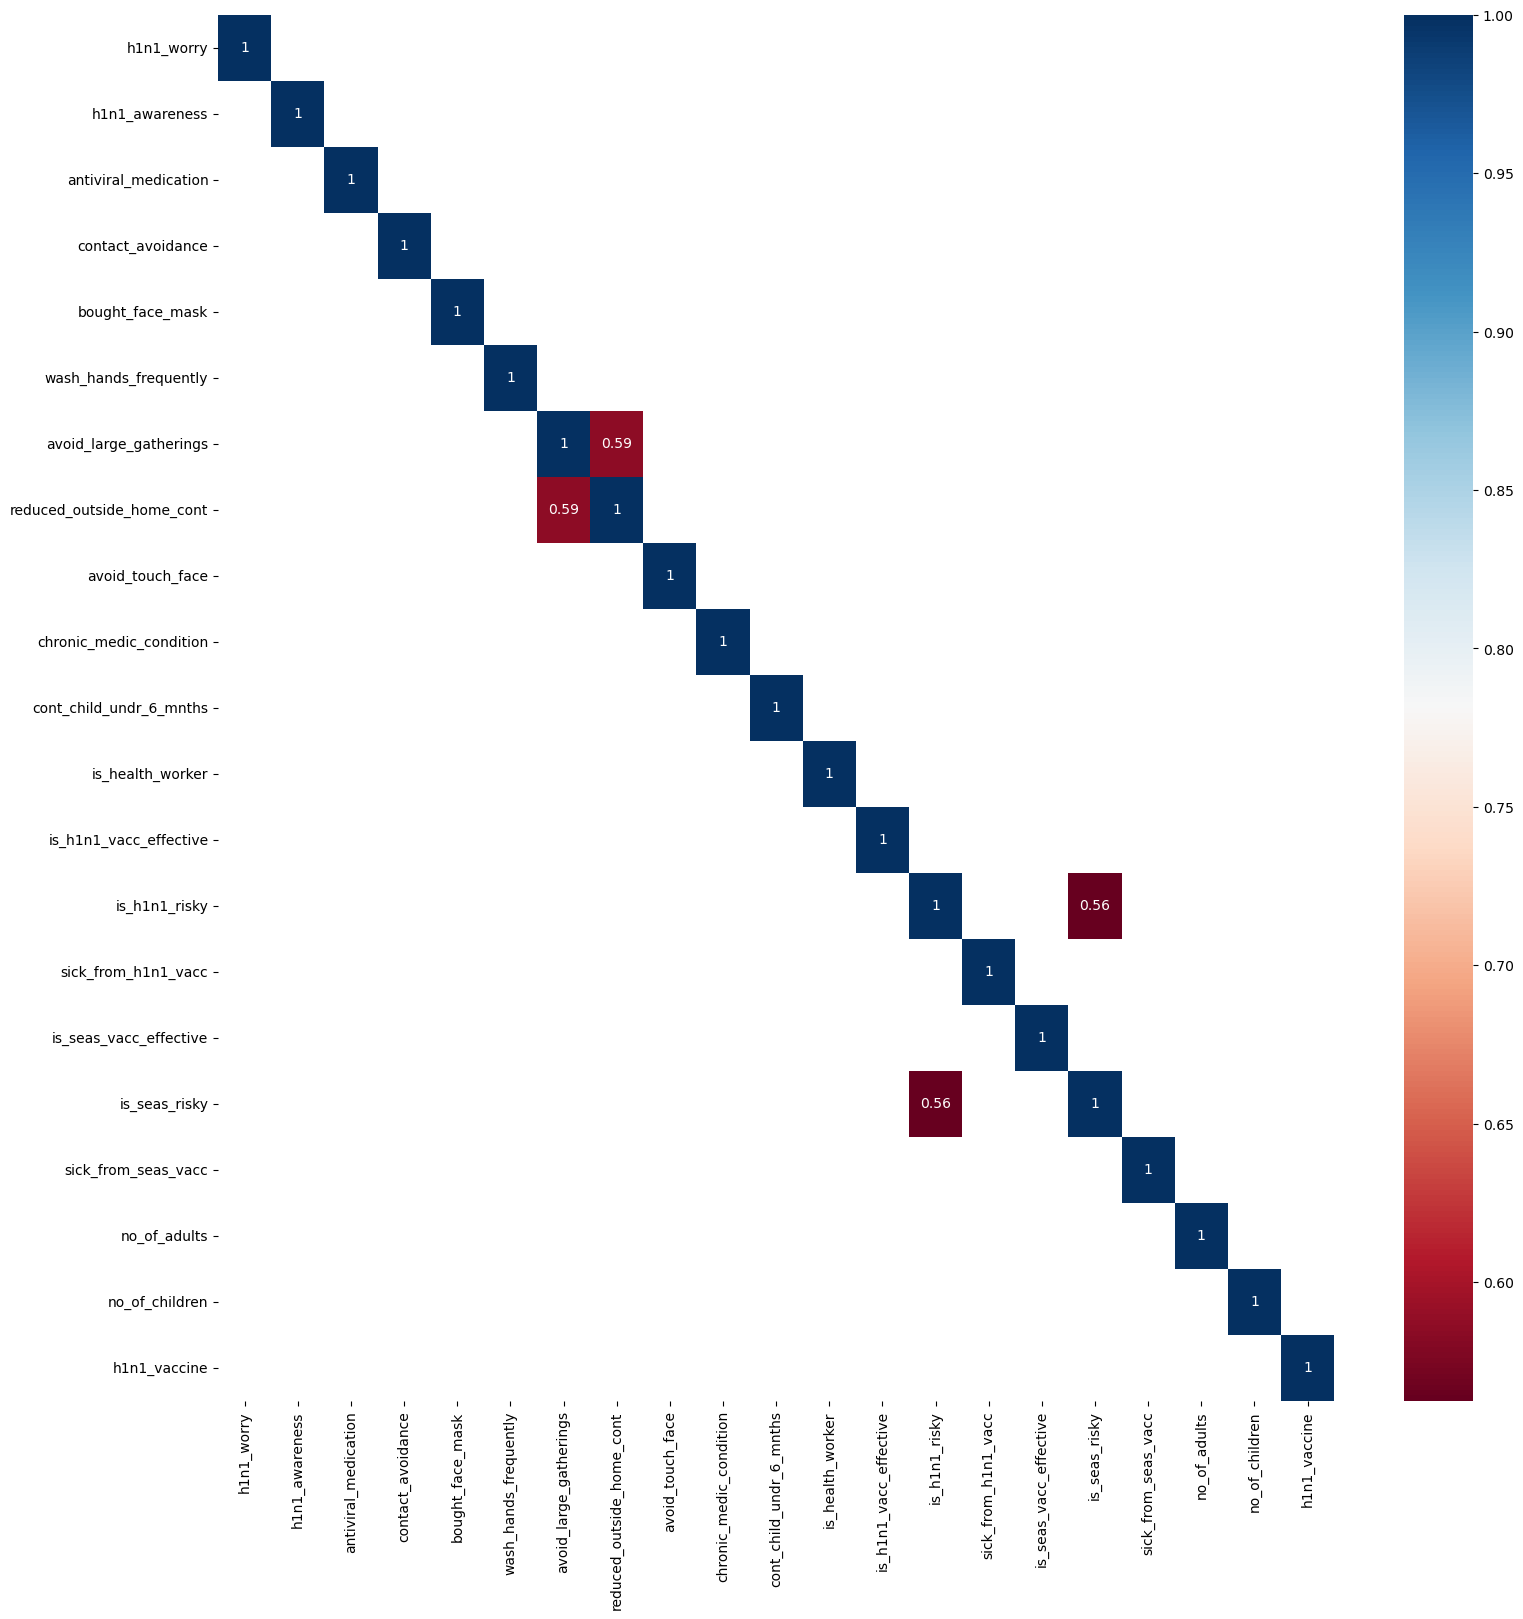

In [56]:
plt.figure(figsize=(18,18))

sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='RdBu')
plt.show()

#### Infernce
1) No features are highly correlated

### Dummy variables creation

In [58]:
print(obj_cols)

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')


In [60]:
df.shape

(23980, 28)

In [61]:
# One Hot Encoder
df_dum = pd.get_dummies(df,columns=obj_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

# Prod LEnc PA  PB  PC
# A     0   1   0   0 
# B     1   0   1   0
# C     2   0   0   1

(23980, 37)
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA'],
      dtype=

In [64]:
df_dum.dtypes

h1n1_worry                        float64
h1n1_awareness                    float64
antiviral_medication              float64
contact_avoidance                 float64
bought_face_mask                  float64
wash_hands_frequently             float64
avoid_large_gatherings            float64
reduced_outside_home_cont         float64
avoid_touch_face                  float64
chronic_medic_condition           float64
cont_child_undr_6_mnths           float64
is_health_worker                  float64
is_h1n1_vacc_effective            float64
is_h1n1_risky                     float64
sick_from_h1n1_vacc               float64
is_seas_vacc_effective            float64
is_seas_risky                     float64
sick_from_seas_vacc               float64
no_of_adults                      float64
no_of_children                    float64
h1n1_vaccine                        int64
age_bracket_35 - 44 Years           uint8
age_bracket_45 - 54 Years           uint8
age_bracket_55 - 64 Years         

#### Select dependent and independent features

In [65]:
x = df_dum.drop('h1n1_vaccine',axis=1)  # x = independent features
y = df_dum['h1n1_vaccine']              # y = dependent feature
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(23980, 36)
(23980,)


#### Split data into train and test data

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16786, 36)
(7194, 36)
(16786,)
(7194,)


#### Create function to evalute the model

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [70]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))

### LogReg model

In [72]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [75]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [76]:
print('Train Score',lr.score(x_train,y_train))
print('Test Score',lr.score(x_test,y_test))

Train Score 0.8169903491004409
Test Score 0.8087294968028913


In [78]:
df['h1n1_vaccine'].value_counts()

0    18828
1     5152
Name: h1n1_vaccine, dtype: int64

In [77]:
ypred = lr.predict(x_test)
eval_model(y_test,ypred)

# [TP FN]
# [FP TN]

# [TN FP]
# [FN TP]

[[5343  266]
 [1110  475]]
Accuracy Score 0.8087294968028913
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5609
           1       0.64      0.30      0.41      1585

    accuracy                           0.81      7194
   macro avg       0.73      0.63      0.65      7194
weighted avg       0.79      0.81      0.78      7194



In [79]:
# Recall = TP/(TP+FN)

### Inferecne
1) The model is not good for generating predictions for 1(target variable). However it can be used as good model for generating predictions for 0(target variable).<br>
2) The reason being data imbalance<br>

### ROC_AUC Curve

In [82]:
ypred_lr_proba = lr.predict_proba(x_test)
print(len(ypred_lr_proba))
print(ypred_lr_proba[:10])

7194
[[0.76751673 0.23248327]
 [0.36901981 0.63098019]
 [0.85262865 0.14737135]
 [0.48173207 0.51826793]
 [0.88222211 0.11777789]
 [0.48599486 0.51400514]
 [0.82844566 0.17155434]
 [0.87590425 0.12409575]
 [0.8600902  0.1399098 ]
 [0.94216976 0.05783024]]


In [85]:
print(sum(ypred_lr_proba[500]))
print(sum(ypred_lr_proba[0]))

1.0
1.0


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
# roc_auc_score returns AUC

In [87]:
def plot_roc_auc(model,ytest,ypred_proba):
    fpr,tpr,thresh = roc_curve(ytest,ypred_proba[:,1])
    auc = roc_auc_score(ytest,ypred_proba[:,1])
    print('AUC',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

AUC 0.7885410614869186


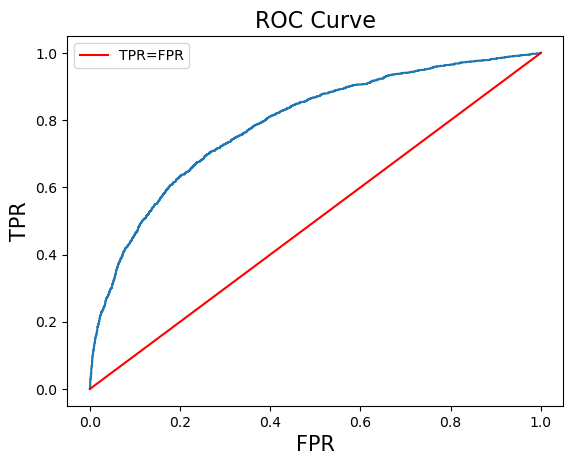

In [89]:
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_lr_proba)

#### Best Threshold

In [90]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(best_thresh_idx)
print(thresh_lr1[best_thresh_idx])

1139
0.21928087361053838
